In [182]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Librerias

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import plotly.express as px

import sys 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('C:/Users/pulzara/Documents/Universidad internacional de valencia/Machine Learning/practica/heart_failure_clinical_records_dataset.csv') 

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
data.isna().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [20]:
columnas = data.columns
columnas 

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

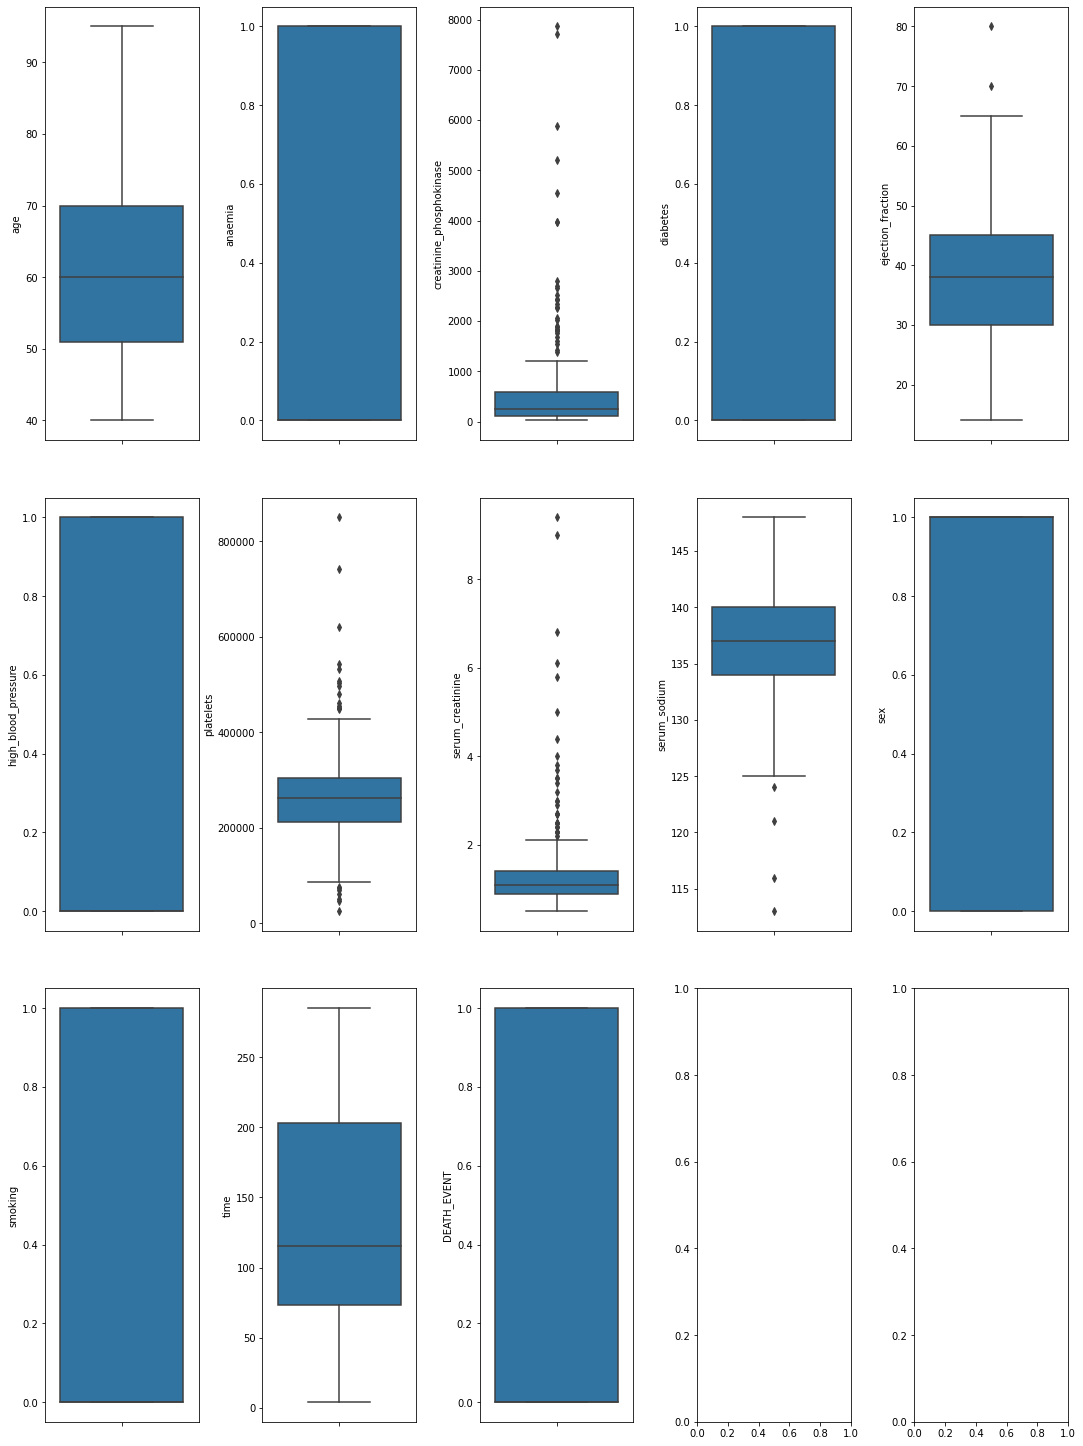

In [40]:
box = data  

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15, 20))  
index = 0
axs = axs.flatten() 
for k,v in data.items(): 
    sns.boxplot(y=k, data=box, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Debido a que los valores extremos aportan información sobre las causas de muertes o estados criticos de salud, se decidio no eliminar ningun tipo de valores anormales.***

In [12]:
corr_matrix = data.corr(method='pearson') 

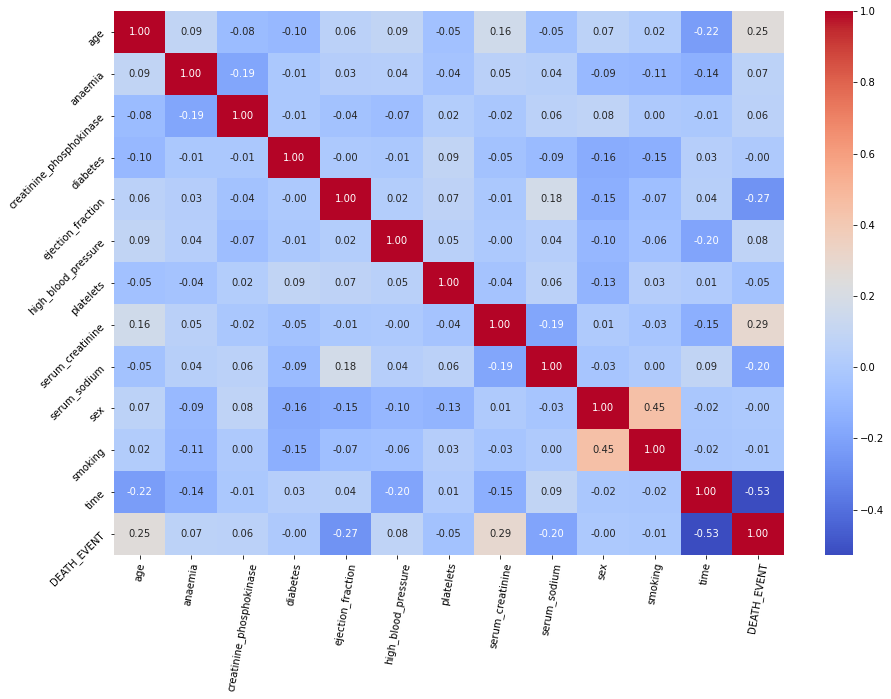

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm')
plt.xticks(rotation = 80)
plt.yticks(rotation = 45)
plt.show()

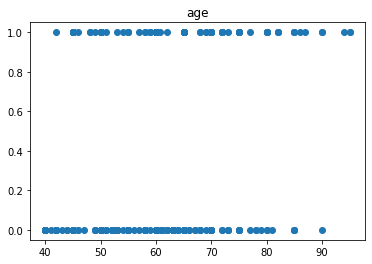

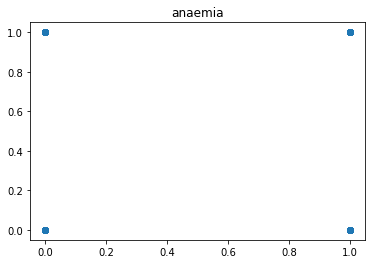

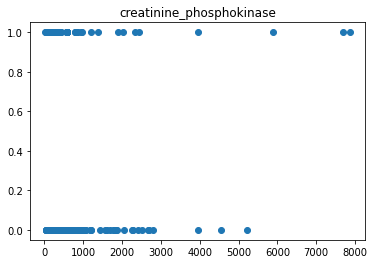

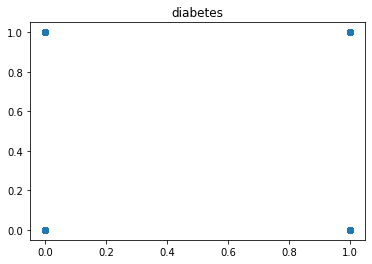

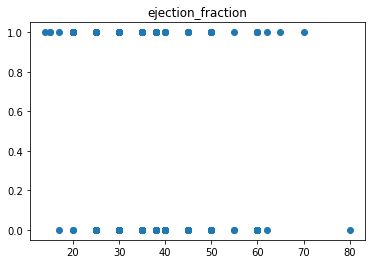

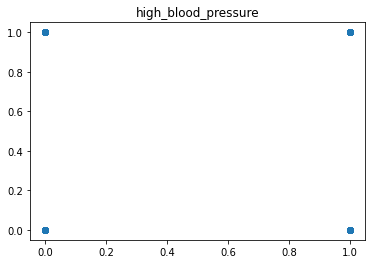

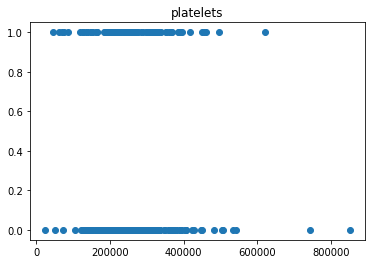

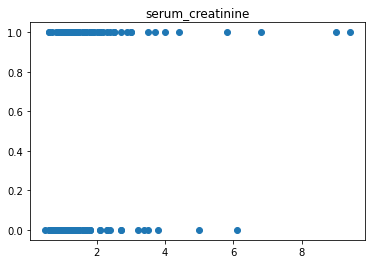

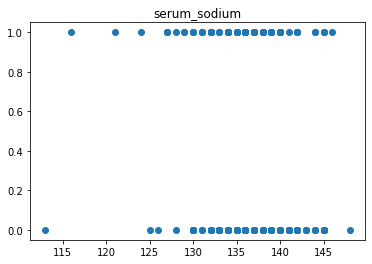

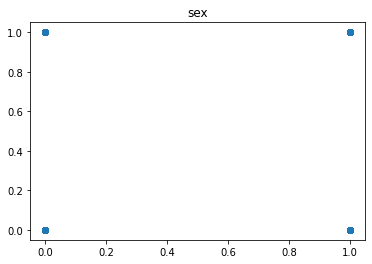

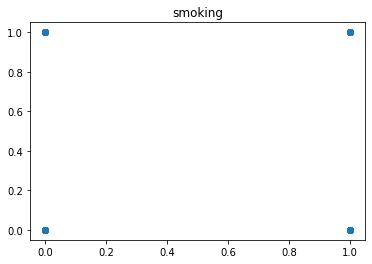

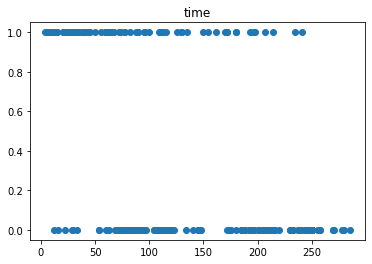

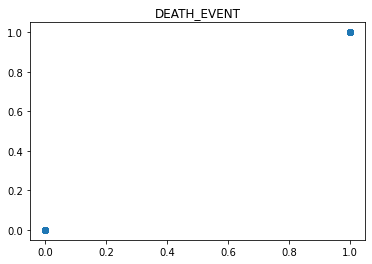

In [47]:
for i in columnas:

    plt.scatter(i, 'DEATH_EVENT', data =data)  
    plt.title(i) 
    plt.show() 

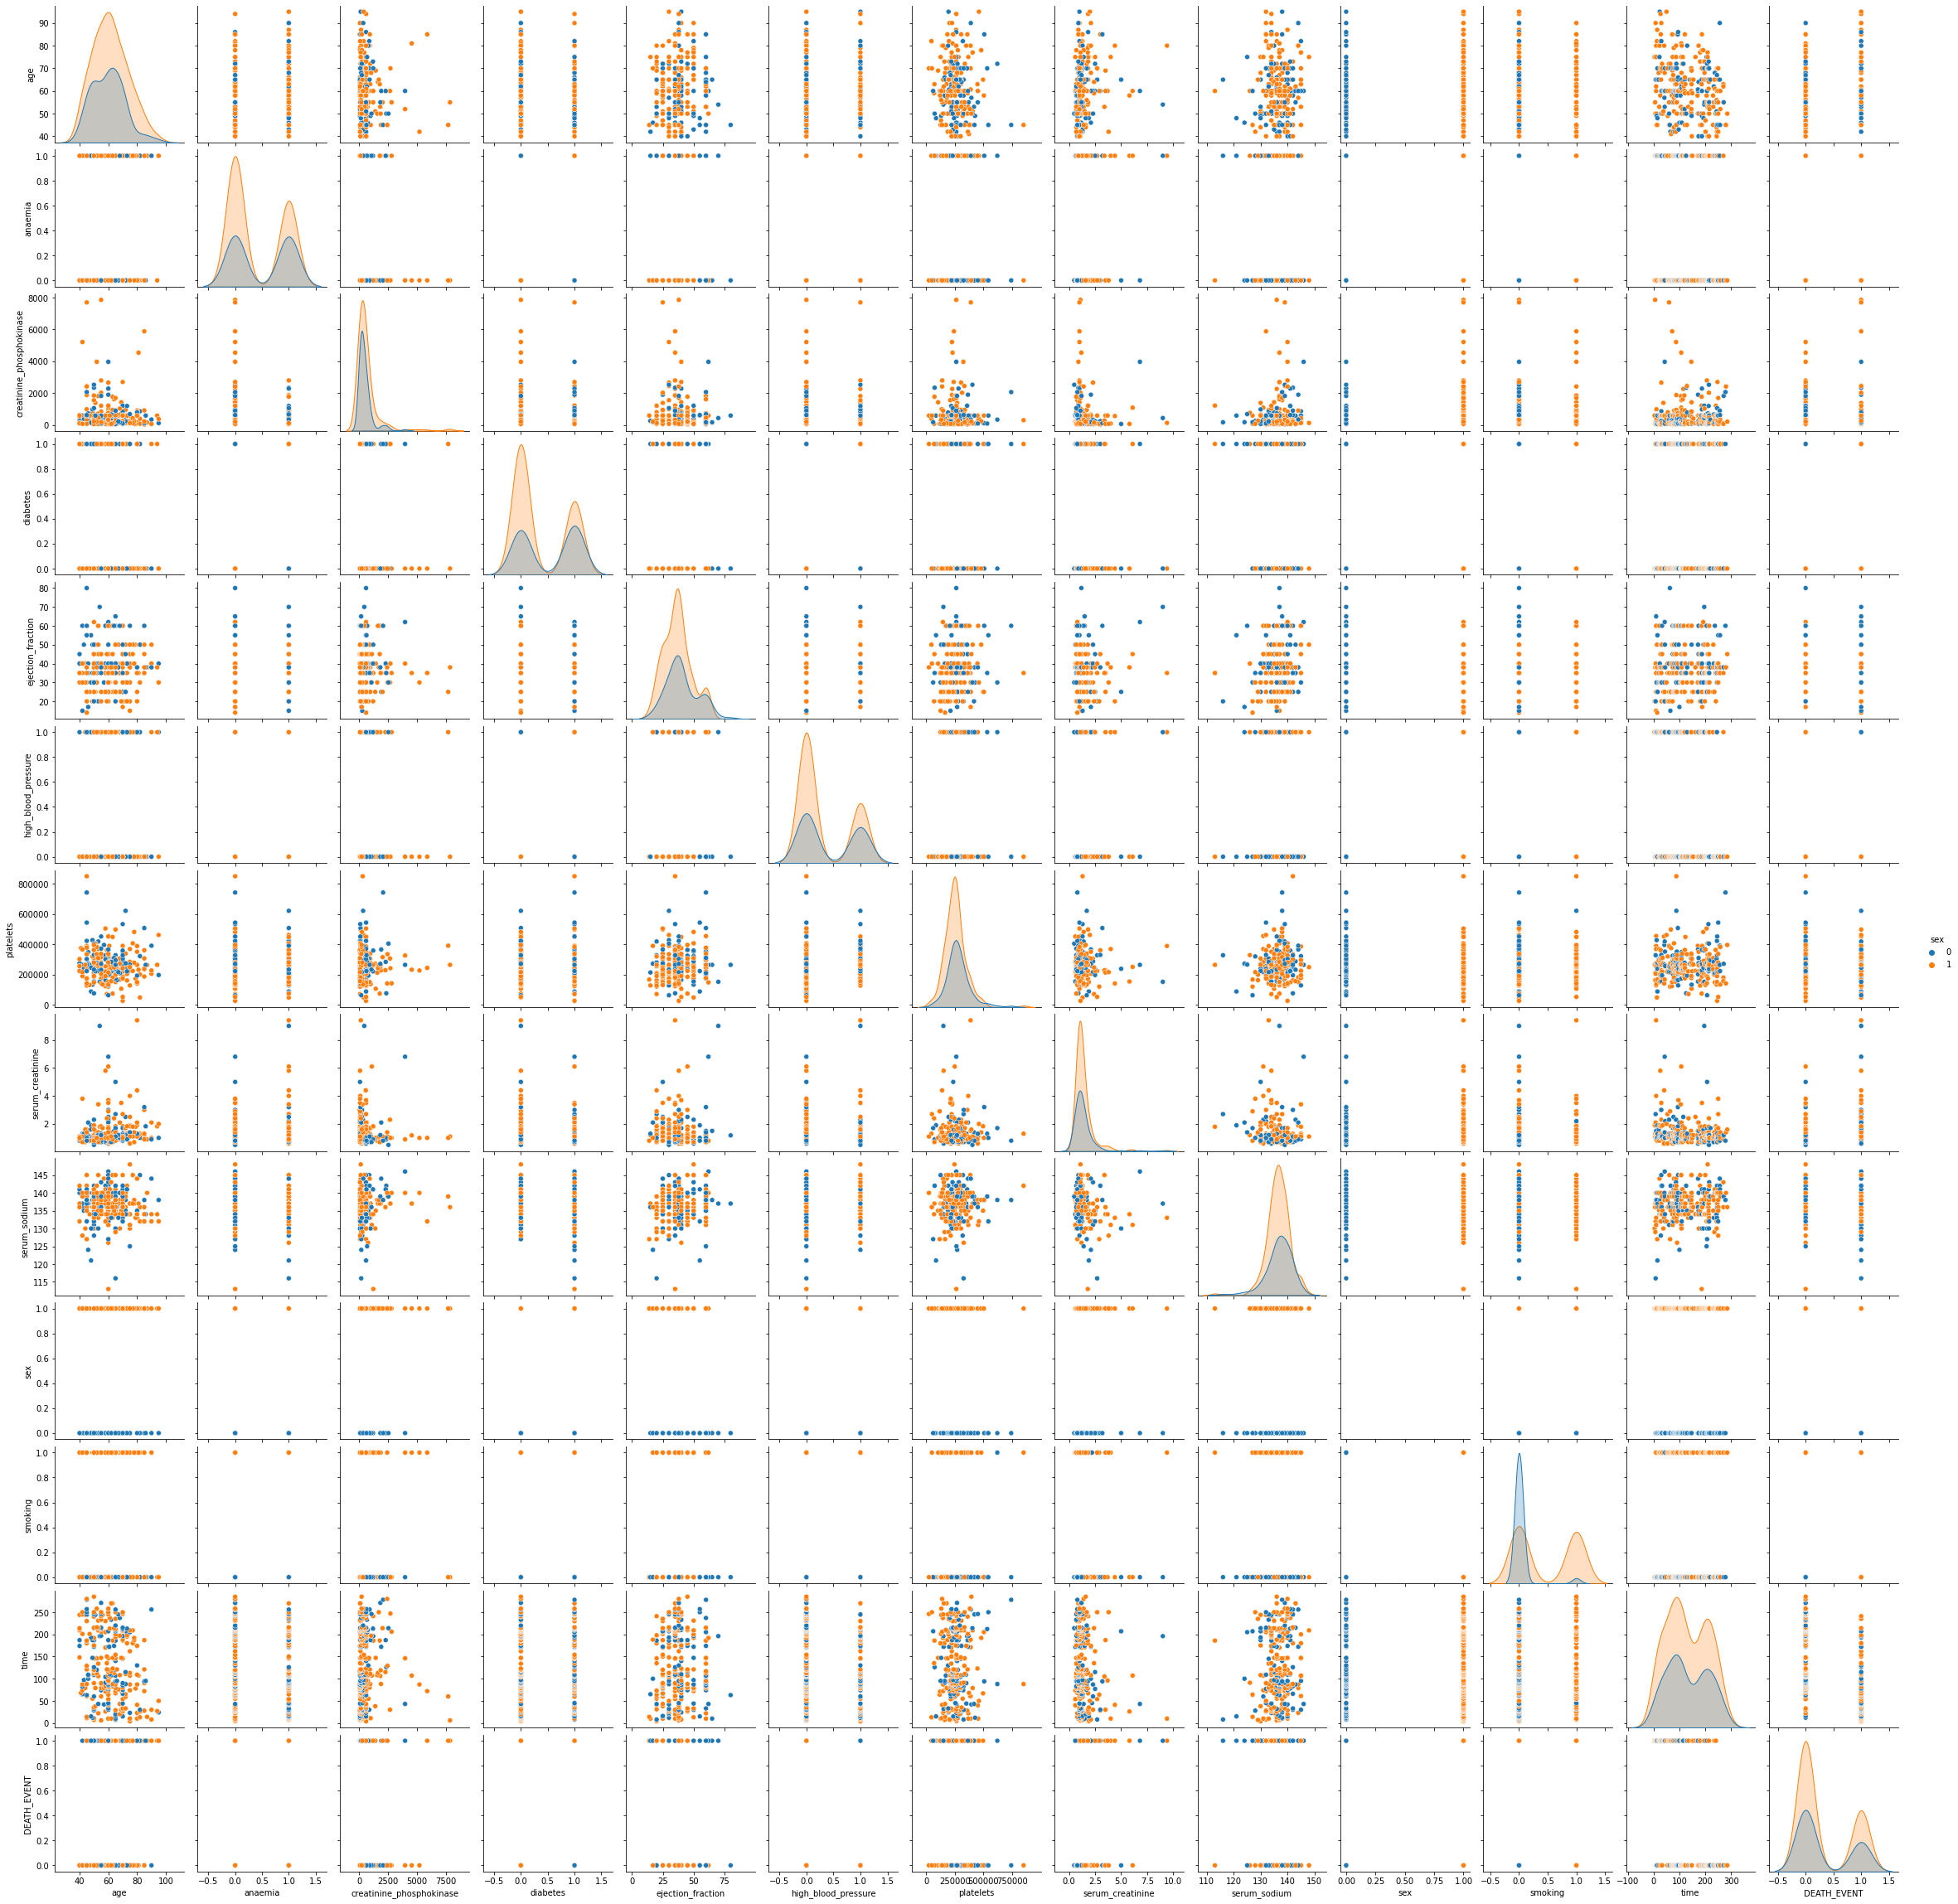

In [50]:
lista = data.columns
#sns.pairplot(sj_train, vars=lista, hue='station_avg_temp_c', palette='Paired')
sns.pairplot(data, vars=lista, hue = 'sex') 

## train test-split

In [7]:
x = data.drop(columns=['DEATH_EVENT'])
y = data.DEATH_EVENT


***Variables normalizadas***

In [8]:
binario = data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']].reset_index(drop = True) 


x_1 = data.drop(columns=['DEATH_EVENT','anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']).reset_index(drop = True) 


In [9]:

scaler = StandardScaler()
Scaler = scaler.fit_transform(x_1)  
Scaler = pd.DataFrame(Scaler) 


In [10]:
X_1 = pd.concat([Scaler, binario], axis = 1 ) 

Hasta aquí todos los equipos tienen que hacer lo mismo, para trabajar todos con el mismo conjunto de train y de test.

**Recordad que el conjunto de TEST no se puede utilizar para entrenar! Si hacéis trampas se notará cuando pongamos las soluciones en común ;)**

A partir de aquí ya podéis empezar a trabajar en vuestras técnicas. ¡Suerte!

# Baseline

## Random Forest

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [184]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)  

RandomForestClassifier(random_state=0)

In [185]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test) 

In [186]:
pd.DataFrame(rf.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False) 

,0
time,0.337758
serum_creatinine,0.135464
ejection_fraction,0.112952
creatinine_phosphokinase,0.091234
age,0.090793
serum_sodium,0.081043
platelets,0.080228
diabetes,0.016205
sex,0.016195
anaemia,0.015290


*La variable que mas peso tiene es el periodo de seguimiento (dias) - time.*

In [187]:
print('acurracy train',accuracy_score(y_train, y_train_pred))
print('acurracy test',accuracy_score(y_test, y_test_pred))   

acurracy train 1.0
acurracy test 0.85


In [188]:
a1 = accuracy_score(y_train, y_train_pred)
a2 = accuracy_score(y_test, y_test_pred)

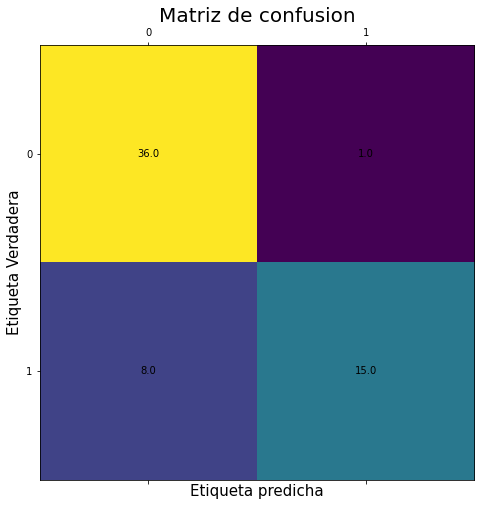

In [189]:
cm = confusion_matrix(y_test,y_test_pred) 


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

*El modelo clasifico 36 etiquetas correctamente como cero y 1 como uno*<br> 
*La etiqueta predicha clasifica 15 datos correctamente como 1, y 8 datos incorrectamente como cero que son 1*

*1 =  muerte*<br> 
*0 = vivo*

<function matplotlib.pyplot.show(close=None, block=None)>

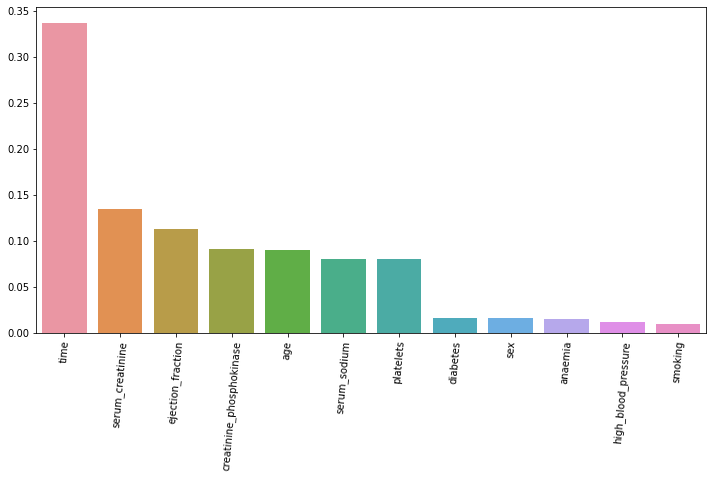

In [191]:
importances = rf.feature_importances_
columns = x_train.columns 
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

## Support Vector Machine 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=0) 

In [20]:
C = 0.4 
clf = SVC(kernel='linear', C=C, random_state=0).fit(x_train, y_train)  

In [21]:
y_train_pred_svm = clf.predict(x_train)
y_test_pred_svm = clf.predict(x_test)

In [22]:
print('acurracy train',accuracy_score(y_train, y_train_pred_svm))
print('acurracy test',accuracy_score(y_test, y_test_pred_svm))   

acurracy train 0.8577405857740585
acurracy test 0.8


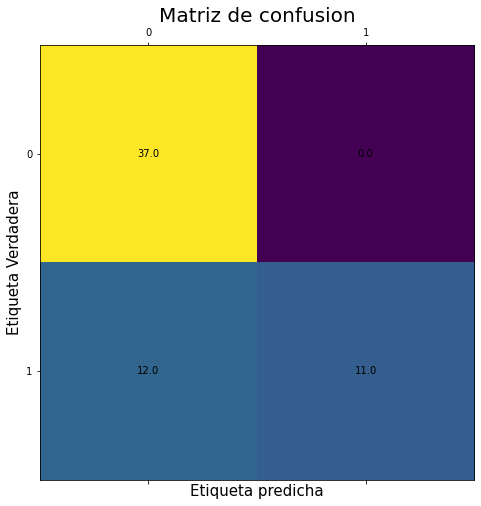

In [23]:
cm = confusion_matrix(y_test,y_test_pred_svm)  


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [24]:
a3 = accuracy_score(y_train, y_train_pred_svm)
a4 = accuracy_score(y_test, y_test_pred_svm)

## knn

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

In [27]:
print('acurracy train',accuracy_score(y_train, y_train_pred_knn))
print('acurracy test',accuracy_score(y_test, y_test_pred_knn))   

acurracy train 0.8535564853556485
acurracy test 0.7333333333333333


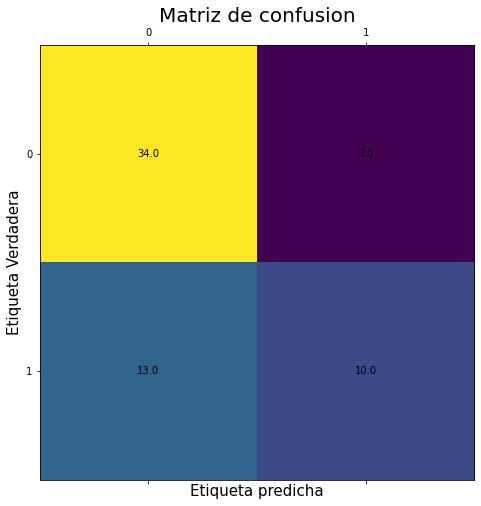

In [28]:
cm = confusion_matrix(y_test,y_test_pred_knn)   


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [29]:
a5 = accuracy_score(y_train, y_train_pred_knn)
a6 = accuracy_score(y_test, y_test_pred_knn)


## Logistic regression

In [30]:
lr = LogisticRegression(random_state=0).fit(x_train, y_train) 

In [31]:
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

In [32]:
print('acurracy train',accuracy_score(y_train, y_train_pred_lr))
print('acurracy test',accuracy_score(y_test, y_test_pred_lr))   

acurracy train 0.8661087866108786
acurracy test 0.7833333333333333


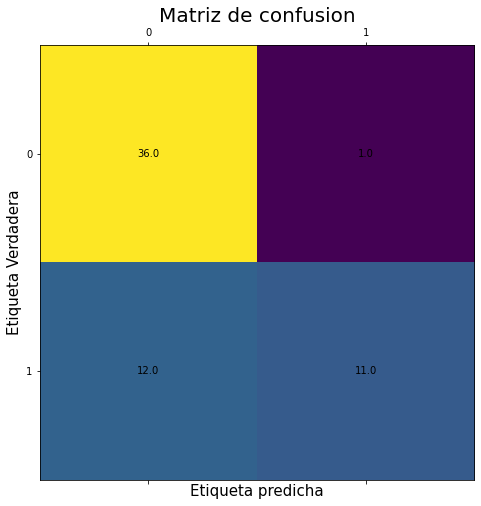

In [33]:
cm = confusion_matrix(y_test,y_test_pred_lr)    


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [34]:
a7 = accuracy_score(y_train, y_train_pred_lr)
a8 = accuracy_score(y_test, y_test_pred_lr)

# *optimizacion de hiperparametros*

## Random forest - randomizersearch

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

In [36]:
rf = RandomForestClassifier()

In [37]:
param_dist = {"n_estimators": np.arange(50,120), # Number of trees in random forest
              "max_features": ['auto', 'sqrt', ''], # Number of features to consider at every split
              "max_depth": np.arange(1,15), # Maximum number of levels in tree 
              "min_samples_leaf": np.arange(0,10), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ['gini', 'entropy'],
              "min_samples_split":np.arange(1,20)
            }

In [38]:
rnd_regres = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, 
                               n_iter = 5, cv = 5, random_state=0, n_jobs = -1, scoring='accuracy')

# Fit the random search model
rnd_regres.fit(x_train, y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt', ''],
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94, 

In [39]:
pd.DataFrame([rnd_regres.best_params_]).T   

,0
n_estimators,105
min_samples_split,2
min_samples_leaf,6
max_features,auto
max_depth,10
criterion,gini
bootstrap,False


In [40]:
rnd_regres.best_score_

0.8743794326241134

In [41]:
prediction_train = rnd_regres.predict(x_train) 
prediction_test = rnd_regres.predict(x_test) 

In [42]:
print('acurracy train',accuracy_score(y_train, prediction_train))
print('acurracy test',accuracy_score(y_test, prediction_test))    

acurracy train 0.9288702928870293
acurracy test 0.85


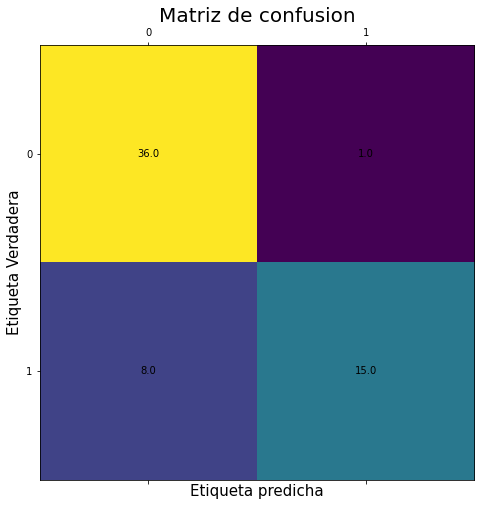

In [43]:
cm = confusion_matrix(y_test,prediction_test )    


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [44]:
a9 = accuracy_score(y_train, prediction_train)
a10 = accuracy_score(y_test, prediction_test)

## Support vector machine - randomizersearch

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=0)  

In [46]:
svm = SVC()

In [47]:
param_grid = {'C': [0.001,0.005, 0.005, 0.1, 1], 
              'kernel': ['rbf', 'lineal'],
              'gamma': ['auto']     
             }

In [48]:
svm_clf = RandomizedSearchCV(estimator = svm, param_distributions = param_grid,  
                               n_iter = 5, cv = 5, random_state=0, n_jobs = -1, scoring='accuracy')

# Fit the random search model
svm_clf.fit(x_train, y_train) 

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.005, 0.005, 0.1, 1],
                                        'gamma': ['auto'],
                                        'kernel': ['rbf', 'lineal']},
                   random_state=0, scoring='accuracy')

In [49]:
pd.DataFrame([svm_clf.best_params_]).T   

,0
kernel,rbf
gamma,auto
C,1


In [50]:
svm_clf.best_score_

0.8072695035460994

In [51]:
prediction_train_svm = svm_clf.predict(x_train) 
prediction_test_svm = svm_clf.predict(x_test) 

In [52]:
print('acurracy train',accuracy_score(y_train, prediction_train_svm))
print('acurracy test',accuracy_score(y_test, prediction_test_svm))   

acurracy train 0.8661087866108786
acurracy test 0.7833333333333333


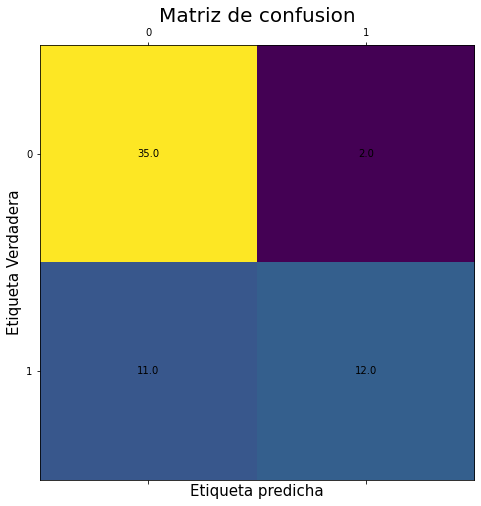

In [53]:
cm = confusion_matrix(y_test,prediction_test_svm)     


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [54]:
a11 = accuracy_score(y_train, prediction_train_svm)
a12 = accuracy_score(y_test, prediction_test_svm)

## KNN - randomizersearch

In [55]:
knn = KNeighborsClassifier()

In [56]:
param_grid = {'n_neighbors': np.arange(50,100),
              'leaf_size': np.arange(20,80), 
              'p': np.arange(1,2),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree','kd_tree']
              
             }

In [57]:
knn_clf = RandomizedSearchCV(estimator = knn, param_distributions = param_grid,  
                               n_iter = 5, cv = 5, random_state=0, n_jobs = -1, scoring='accuracy')

# Fit the random search model
knn_clf.fit(x_train, y_train) 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79]),
                                        'n_neighbors': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'p': array([1]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='

In [58]:
pd.DataFrame([knn_clf.best_params_]).T    

,0
weights,distance
p,1
n_neighbors,61
leaf_size,31
algorithm,kd_tree


In [59]:
knn_clf.best_score_ 

0.7155141843971632

In [60]:
prediction_train_knn = knn_clf.predict(x_train)  
prediction_test_knn = knn_clf.predict(x_test)  

In [61]:
print('acurracy train',accuracy_score(y_train, prediction_train_knn))
print('acurracy test',accuracy_score(y_test, prediction_test_knn))   

acurracy train 1.0
acurracy test 0.65


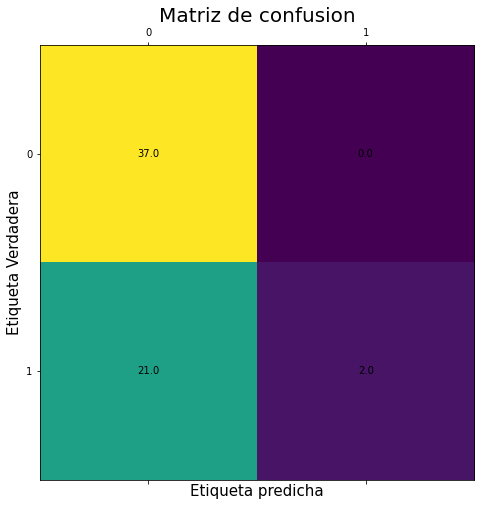

In [62]:
cm = confusion_matrix(y_test,prediction_test_knn)      


fig,ax = plt.subplots(figsize = (12,8))
ax.matshow(cm)
plt.title('Matriz de confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta predicha', fontsize=15) 
for (i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [63]:
a13 = accuracy_score(y_train, prediction_train_knn)
a14 = accuracy_score(y_test, prediction_test_knn)

# Metricas

In [152]:
valores = {'Random Forest -BS': [a1,a2],
           'Support Vector Machine BS': [a3,a4],
           'KNN BS': [a5,a6],
           'Logistic regression': [a7,a8],
           'Random Forest OP': [a9,a10],
           'Support Vector Machine OP': [a11,a12],
           'KNN OP':[a13,a14],
          }
           

metricas = pd.DataFrame(valores,index = ['train', 'test'] ).T 

In [153]:
metricas

,train,test
Random Forest -BS,1.000000,0.850000
Support Vector Machine BS,0.857741,0.800000
KNN BS,0.853556,0.733333
Logistic regression,0.866109,0.783333
Random Forest OP,0.928870,0.850000
Support Vector Machine OP,0.866109,0.783333
KNN OP,1.000000,0.650000


In [154]:
metricas = metricas.sort_values(by = 'train', ascending=True) 
metricas.reset_index(inplace=True) 

In [155]:
metricas = metricas.rename(columns={'index':'Modelo'})
metricas

,Modelo,train,test
0,KNN BS,0.853556,0.733333
1,Support Vector Machine BS,0.857741,0.800000
2,Logistic regression,0.866109,0.783333
3,Support Vector Machine OP,0.866109,0.783333
4,Random Forest OP,0.928870,0.850000
5,Random Forest -BS,1.000000,0.850000
6,KNN OP,1.000000,0.650000


In [157]:
fig = px.bar(metricas, x="train", y='Modelo', orientation='h', height=500, width=1000,title="Accuracy Train - Modelos de clasificación",
          text=metricas.train.round(4))   
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [162]:
metricas = metricas.sort_values(by = 'test', ascending=True) 
metricas

,Modelo,train,test
6,KNN OP,1.000000,0.650000
0,KNN BS,0.853556,0.733333
2,Logistic regression,0.866109,0.783333
3,Support Vector Machine OP,0.866109,0.783333
1,Support Vector Machine BS,0.857741,0.800000
4,Random Forest OP,0.928870,0.850000
5,Random Forest -BS,1.000000,0.850000


In [161]:
fig = px.bar(metricas, x="test", y='Modelo', orientation='h', height=500, width=1000,title="Accuracy Test - Modelos de clasificación",
             text=metricas.test.round(4))   
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [164]:
fig = px.bar(metricas.sort_values(by = 'train'), x=["train","test"], y='Modelo', orientation='h', height=500, width=1000,title="Accuracy Train Test - Modelos de clasificación",
            )  
fig.show() 